In [74]:
import yfinance as yf

snp_df = yf.download('^SPX', start='2010-01-01')
snp_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2024-06-05,5314.479980,5354.160156,5297.640137,5354.029785,5354.029785,3591460000
2024-06-06,5357.799805,5362.350098,5335.359863,5352.959961,5352.959961,3609990000
2024-06-07,5343.810059,5375.080078,5331.330078,5346.990234,5346.990234,3692760000


In [75]:
import pandas as pd

import pandas as pd
import numpy as np

# 'Adj Close' 열만 추출
adj_close = snp_df['Adj Close']

# 로그 변환 적용
log_adj_close = np.log(adj_close)

# 변환된 데이터를 데이터프레임으로 변환
snp_df = pd.DataFrame(log_adj_close, columns=['Adj Close'])

# 결과 출력
snp_df


,Adj Close
Date,
2010-01-04,7.032615
2010-01-05,7.035726
2010-01-06,7.036272
2010-01-07,7.040265
2010-01-08,7.043142
...,...
2024-06-05,8.585605
2024-06-06,8.585405
2024-06-07,8.584289


In [76]:
snp_df = snp_df['2018-01-01':]
snp_df

,Adj Close
Date,
2018-01-02,7.899454
2018-01-03,7.905832
2018-01-04,7.909853
2018-01-05,7.916862
2018-01-08,7.918523
...,...
2024-06-05,8.585605
2024-06-06,8.585405
2024-06-07,8.584289


In [77]:
snp_df = snp_df.reset_index()
snp_df

,Date,Adj Close
0,2018-01-02,7.899454
1,2018-01-03,7.905832
2,2018-01-04,7.909853
3,2018-01-05,7.916862
4,2018-01-08,7.918523
...,...,...
1616,2024-06-05,8.585605
1617,2024-06-06,8.585405
1618,2024-06-07,8.584289
1619,2024-06-10,8.586867


In [78]:
import numpy as np

snp_df = snp_df.rename(columns={'Date': 'ds', 'Adj Close' : 'y'})
snp_df

,ds,y
0,2018-01-02,7.899454
1,2018-01-03,7.905832
2,2018-01-04,7.909853
3,2018-01-05,7.916862
4,2018-01-08,7.918523
...,...,...
1616,2024-06-05,8.585605
1617,2024-06-06,8.585405
1618,2024-06-07,8.584289
1619,2024-06-10,8.586867


In [79]:
train_df = snp_df.iloc[:int(len(snp_df) * 0.8)]
train_df

,ds,y
0,2018-01-02,7.899454
1,2018-01-03,7.905832
2,2018-01-04,7.909853
3,2018-01-05,7.916862
4,2018-01-08,7.918523
...,...,...
1291,2023-02-17,8.313629
1292,2023-02-21,8.293384
1293,2023-02-22,8.291810
1294,2023-02-23,8.297125


In [80]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(snp_df) * 0.8)
test_len = int(len(snp_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = snp_df.iloc[: train_len]
test_df = snp_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

15:10:32 - cmdstanpy - INFO - Chain [1] start processing
15:10:33 - cmdstanpy - INFO - Chain [1] done processing
15:10:40 - cmdstanpy - INFO - Chain [1] start processing
15:10:40 - cmdstanpy - INFO - Chain [1] done processing
15:10:47 - cmdstanpy - INFO - Chain [1] start processing
15:10:48 - cmdstanpy - INFO - Chain [1] done processing
15:10:54 - cmdstanpy - INFO - Chain [1] start processing
15:10:54 - cmdstanpy - INFO - Chain [1] done processing
15:11:01 - cmdstanpy - INFO - Chain [1] start processing
15:11:01 - cmdstanpy - INFO - Chain [1] done processing
15:11:08 - cmdstanpy - INFO - Chain [1] start processing
15:11:09 - cmdstanpy - INFO - Chain [1] done processing
15:11:17 - cmdstanpy - INFO - Chain [1] start processing
15:11:17 - cmdstanpy - INFO - Chain [1] done processing
15:11:24 - cmdstanpy - INFO - Chain [1] start processing
15:11:26 - cmdstanpy - INFO - Chain [1] done processing
15:11:34 - cmdstanpy - INFO - Chain [1] start processing
15:11:35 - cmdstanpy - INFO - Chain [1]

In [81]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
4,0.05,1.00,additive,0.022223
2,0.05,0.10,additive,0.022462
6,0.05,10.00,additive,0.022558
0,0.05,0.05,additive,0.022568
1,0.05,0.05,multiplicative,0.022663
3,0.05,0.10,multiplicative,0.022848
10,0.10,0.10,additive,0.022850
8,0.10,0.05,additive,0.022888
14,0.10,10.00,additive,0.022941
12,0.10,1.00,additive,0.023038


In [104]:
# 일단 여기 값 위에꺼 보고 수정해야 합니다.
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=1.00, 
                seasonality_mode='additive')
model.fit(snp_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
# 뒤에 일정 조절해서 오늘 날짜랑 비교해봅시다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1370:]

15:19:56 - cmdstanpy - INFO - Chain [1] start processing
15:19:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1370,2023-06-13,8.360775,8.329018,8.392997
1371,2023-06-14,8.360663,8.330143,8.392104
1372,2023-06-15,8.360515,8.328944,8.393550
1373,2023-06-16,8.360601,8.329550,8.393437
1374,2023-06-20,8.360656,8.328269,8.390524
...,...,...,...,...
1981,2025-06-07,8.791543,8.093369,9.478223
1982,2025-06-08,8.792016,8.106026,9.465859
1983,2025-06-09,8.810857,8.123781,9.480272
1984,2025-06-10,8.811604,8.112013,9.509952


In [105]:
b_df = snp_df.copy()
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

# 여기는 위에서 로그 씌워서 여기는 지수 씌워줌
b_df = b_df.apply(np.exp)
forecast_df = forecast_df.apply(np.exp)

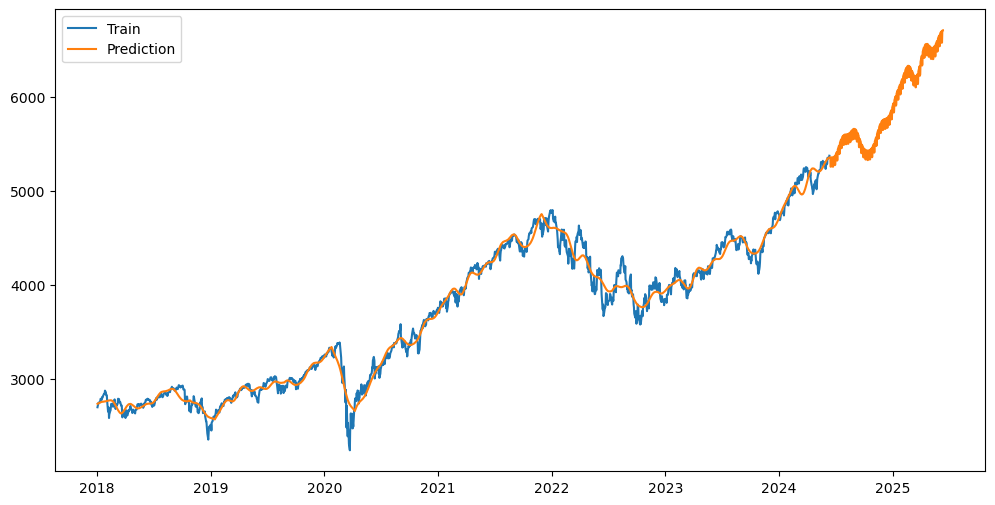

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(b_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


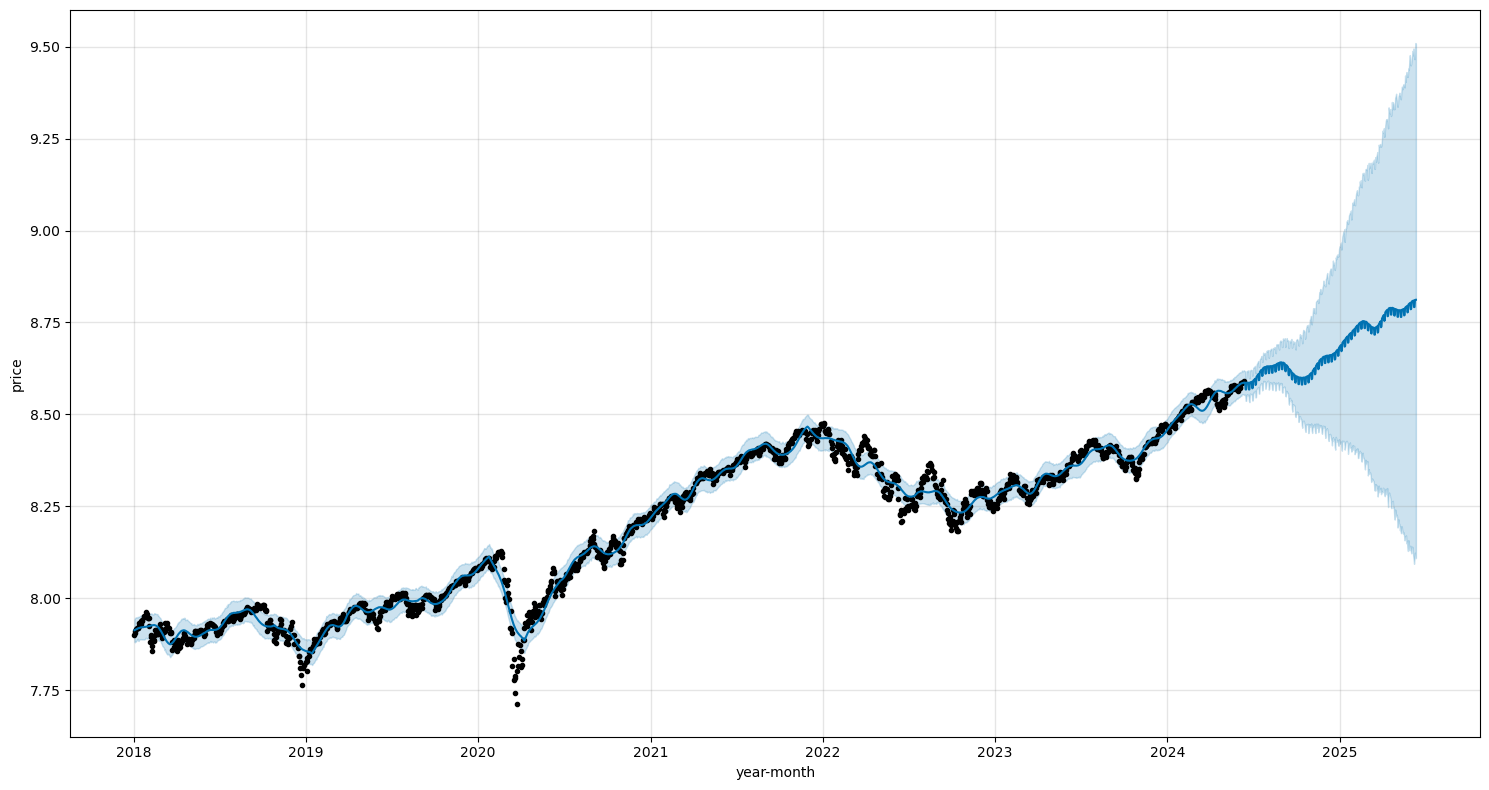

In [107]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime obje

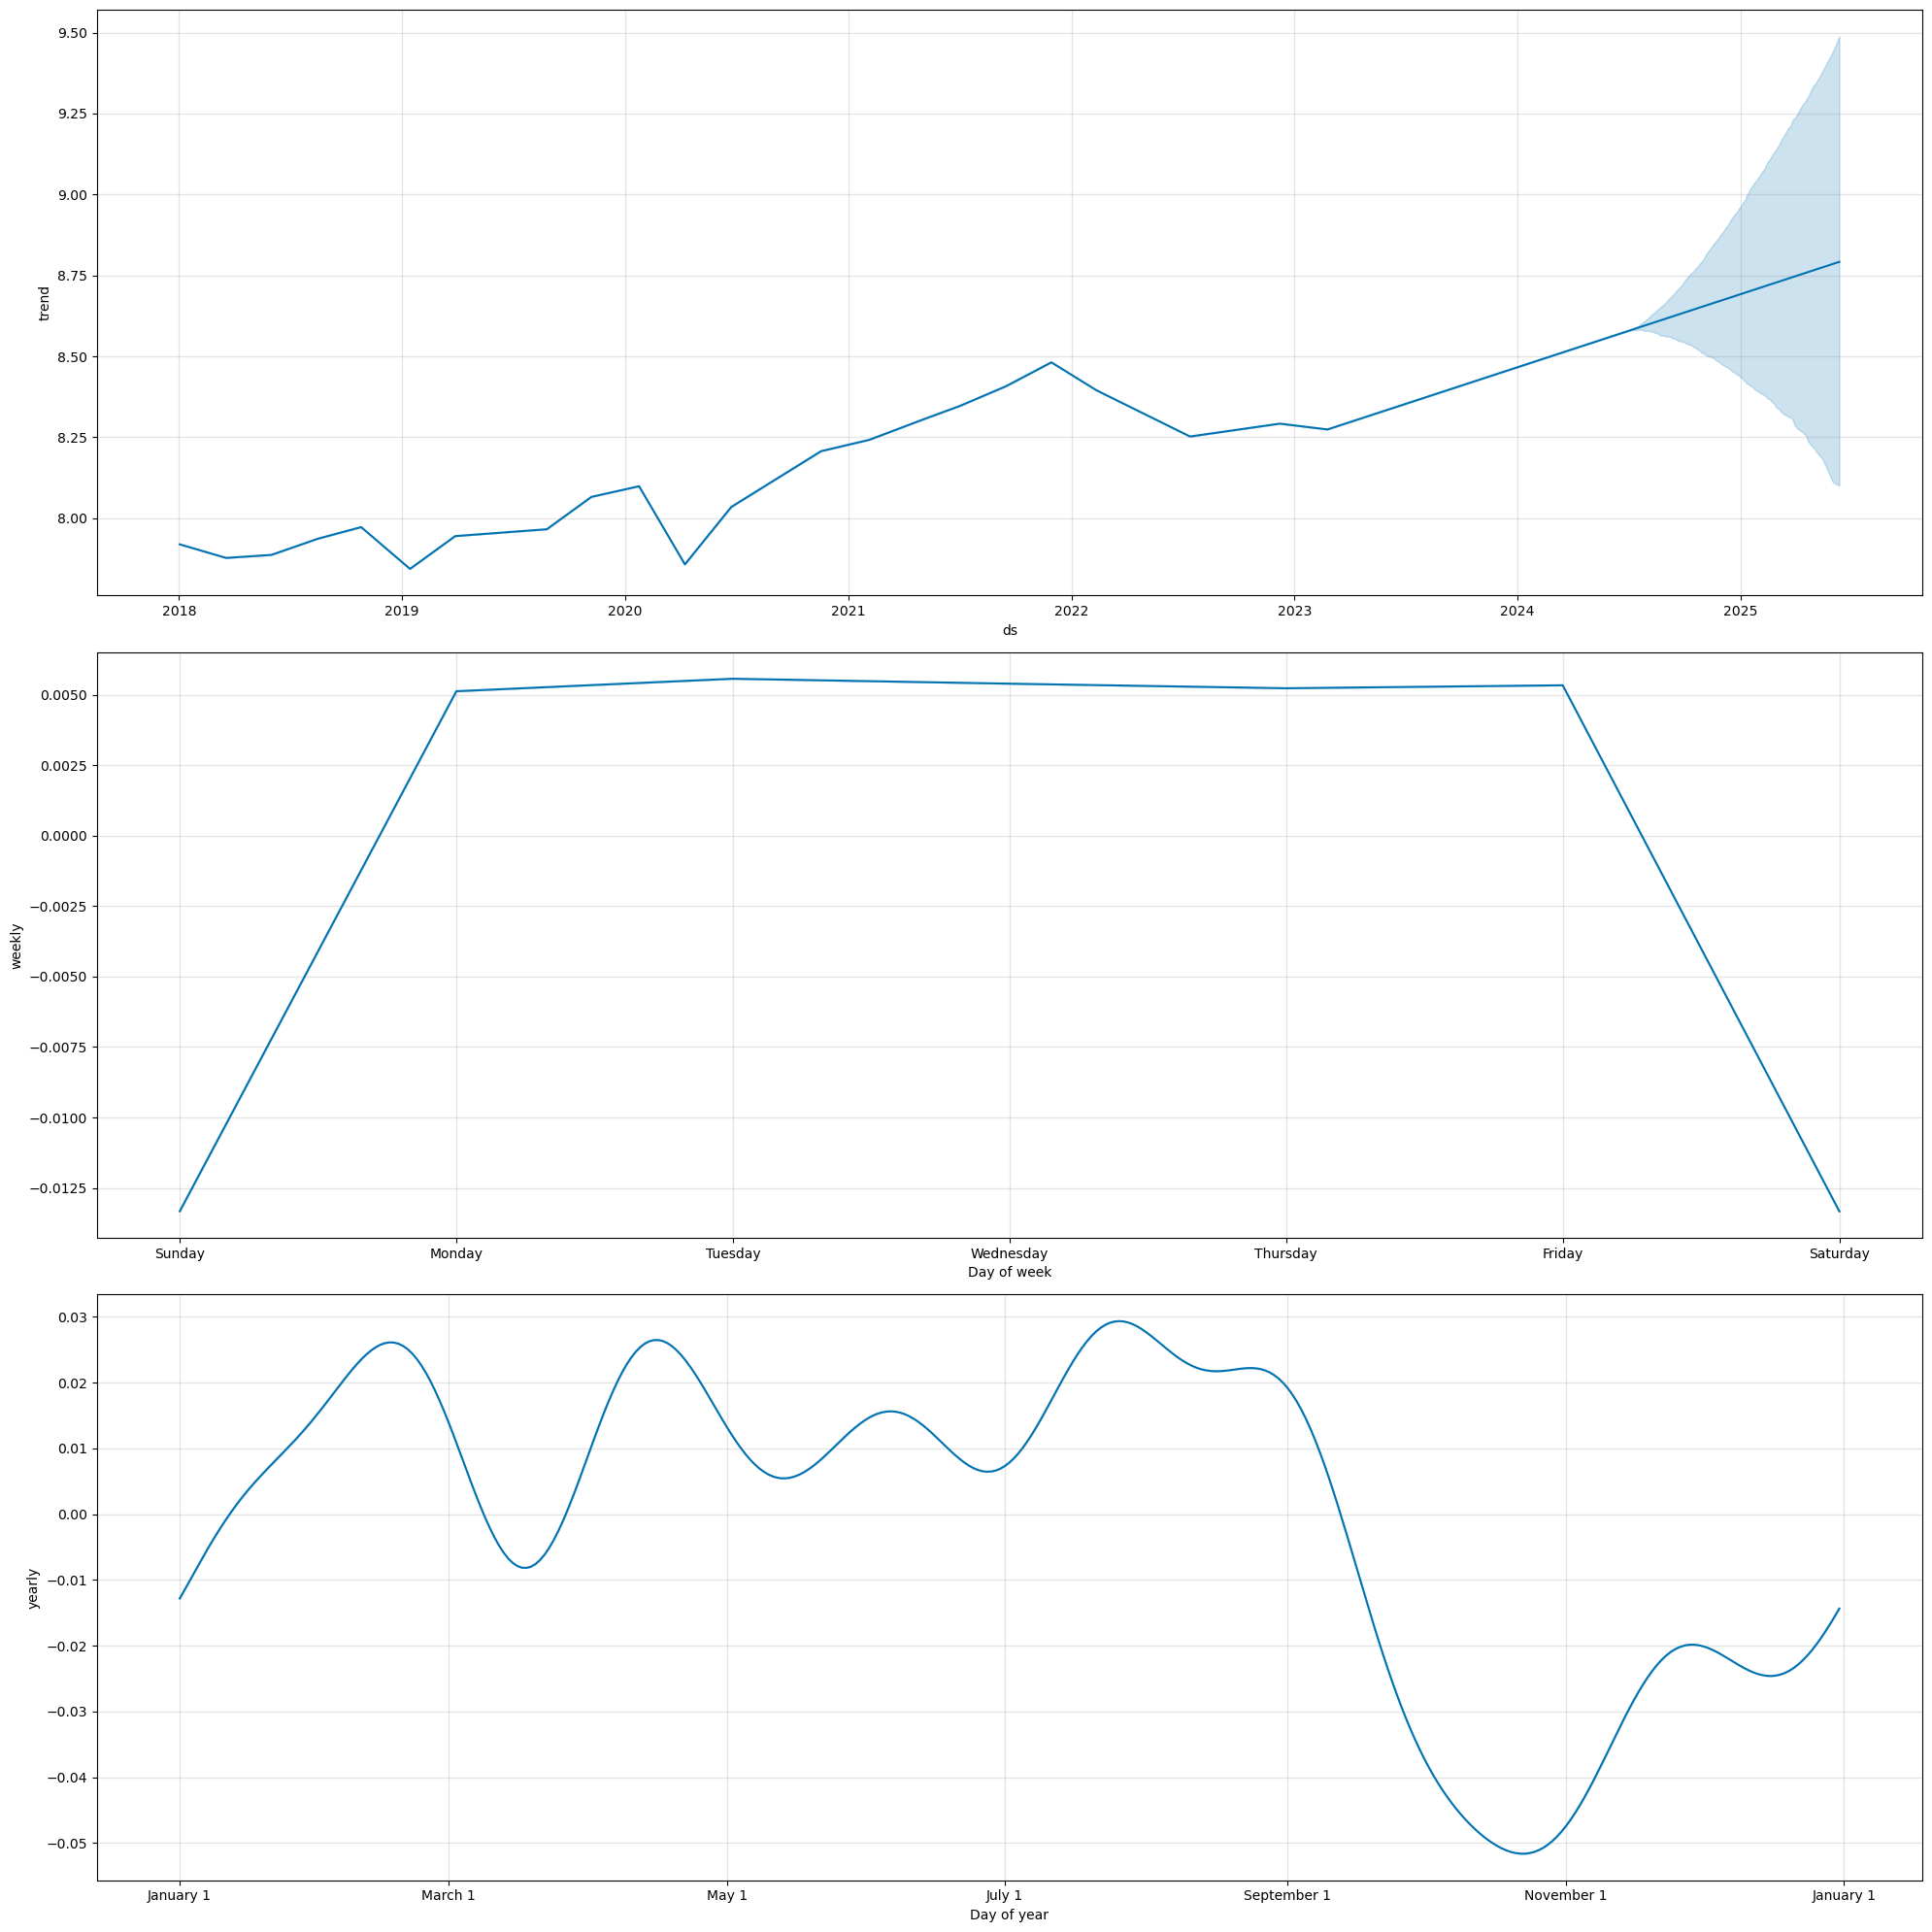

In [108]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

In [109]:
import matplotlib.pyplot as plt

In [112]:
forecast_df[['yhat', 'yhat_lower', 'yhat_upper']][1370:]

,yhat,yhat_lower,yhat_upper
ds,,,
2023-06-13,4276.008200,4142.347982,4416.034493
2023-06-14,4275.526977,4147.011539,4412.092615
2023-06-15,4274.897411,4142.039712,4418.476826
2023-06-16,4275.261396,4144.553549,4417.977452
2023-06-20,4275.500062,4139.246089,4405.123857
...,...,...,...
2025-06-07,6578.372518,3272.693389,13071.942989
2025-06-08,6581.490322,3314.379464,12911.316497
2025-06-09,6706.665370,3373.752630,13098.754695
